In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
fraudata=pd.read_csv('Fraud_check.csv')
fraudata

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# EDA

In [3]:
fraudata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
fraudata.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
fraudata.isnull().sum() 

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

<Figure size 1500x800 with 0 Axes>

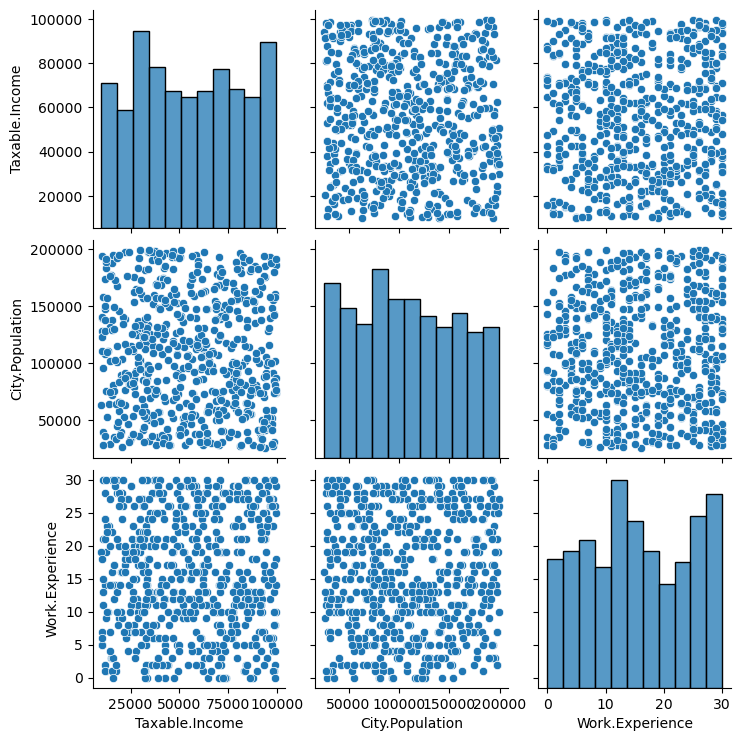

In [6]:
plt.figure(figsize=(15,8))
sns.pairplot(fraudata)
plt.show()

In [7]:
label_encoder=preprocessing.LabelEncoder()
fraudata['Undergrad']=label_encoder.fit_transform(fraudata['Undergrad'])
fraudata['Marital.Status']=label_encoder.fit_transform(fraudata['Marital.Status'])
fraudata['Urban']=label_encoder.fit_transform(fraudata['Urban'])
fraudata

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [8]:
tax_value=[]
for i in fraudata['Taxable.Income']:
 if i<=30000:
     tax_value.append("risky")
 else:
     tax_value.append("Good")
fraudata['tax_value']=tax_value 

In [9]:
fraudata.drop(['Taxable.Income'], axis=1, inplace=True)
fraudata

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_value
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good
...,...,...,...,...,...,...
595,1,0,39492,7,1,Good
596,1,0,55369,2,1,Good
597,0,0,154058,0,1,Good
598,1,1,180083,17,0,Good


In [10]:
label_encoder=preprocessing.LabelEncoder()
fraudata['tax_value']=label_encoder.fit_transform(fraudata['tax_value'])
fraudata

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_value
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [11]:
x=fraudata.iloc[:,:5]
y=fraudata.tax_value

In [12]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [13]:
y 

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: tax_value, Length: 600, dtype: int32

In [14]:
y.value_counts()

0    476
1    124
Name: tax_value, dtype: int64

In [15]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42) 

# Decision Tree Model

In [16]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=2)

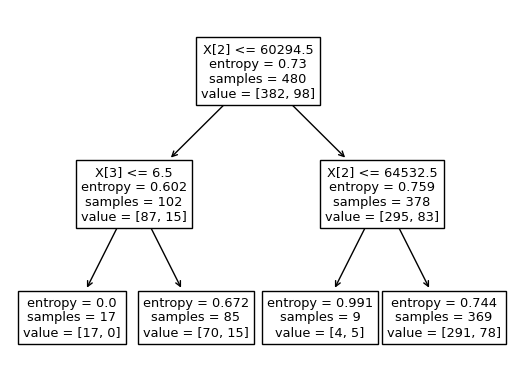

In [17]:
tree.plot_tree(model);

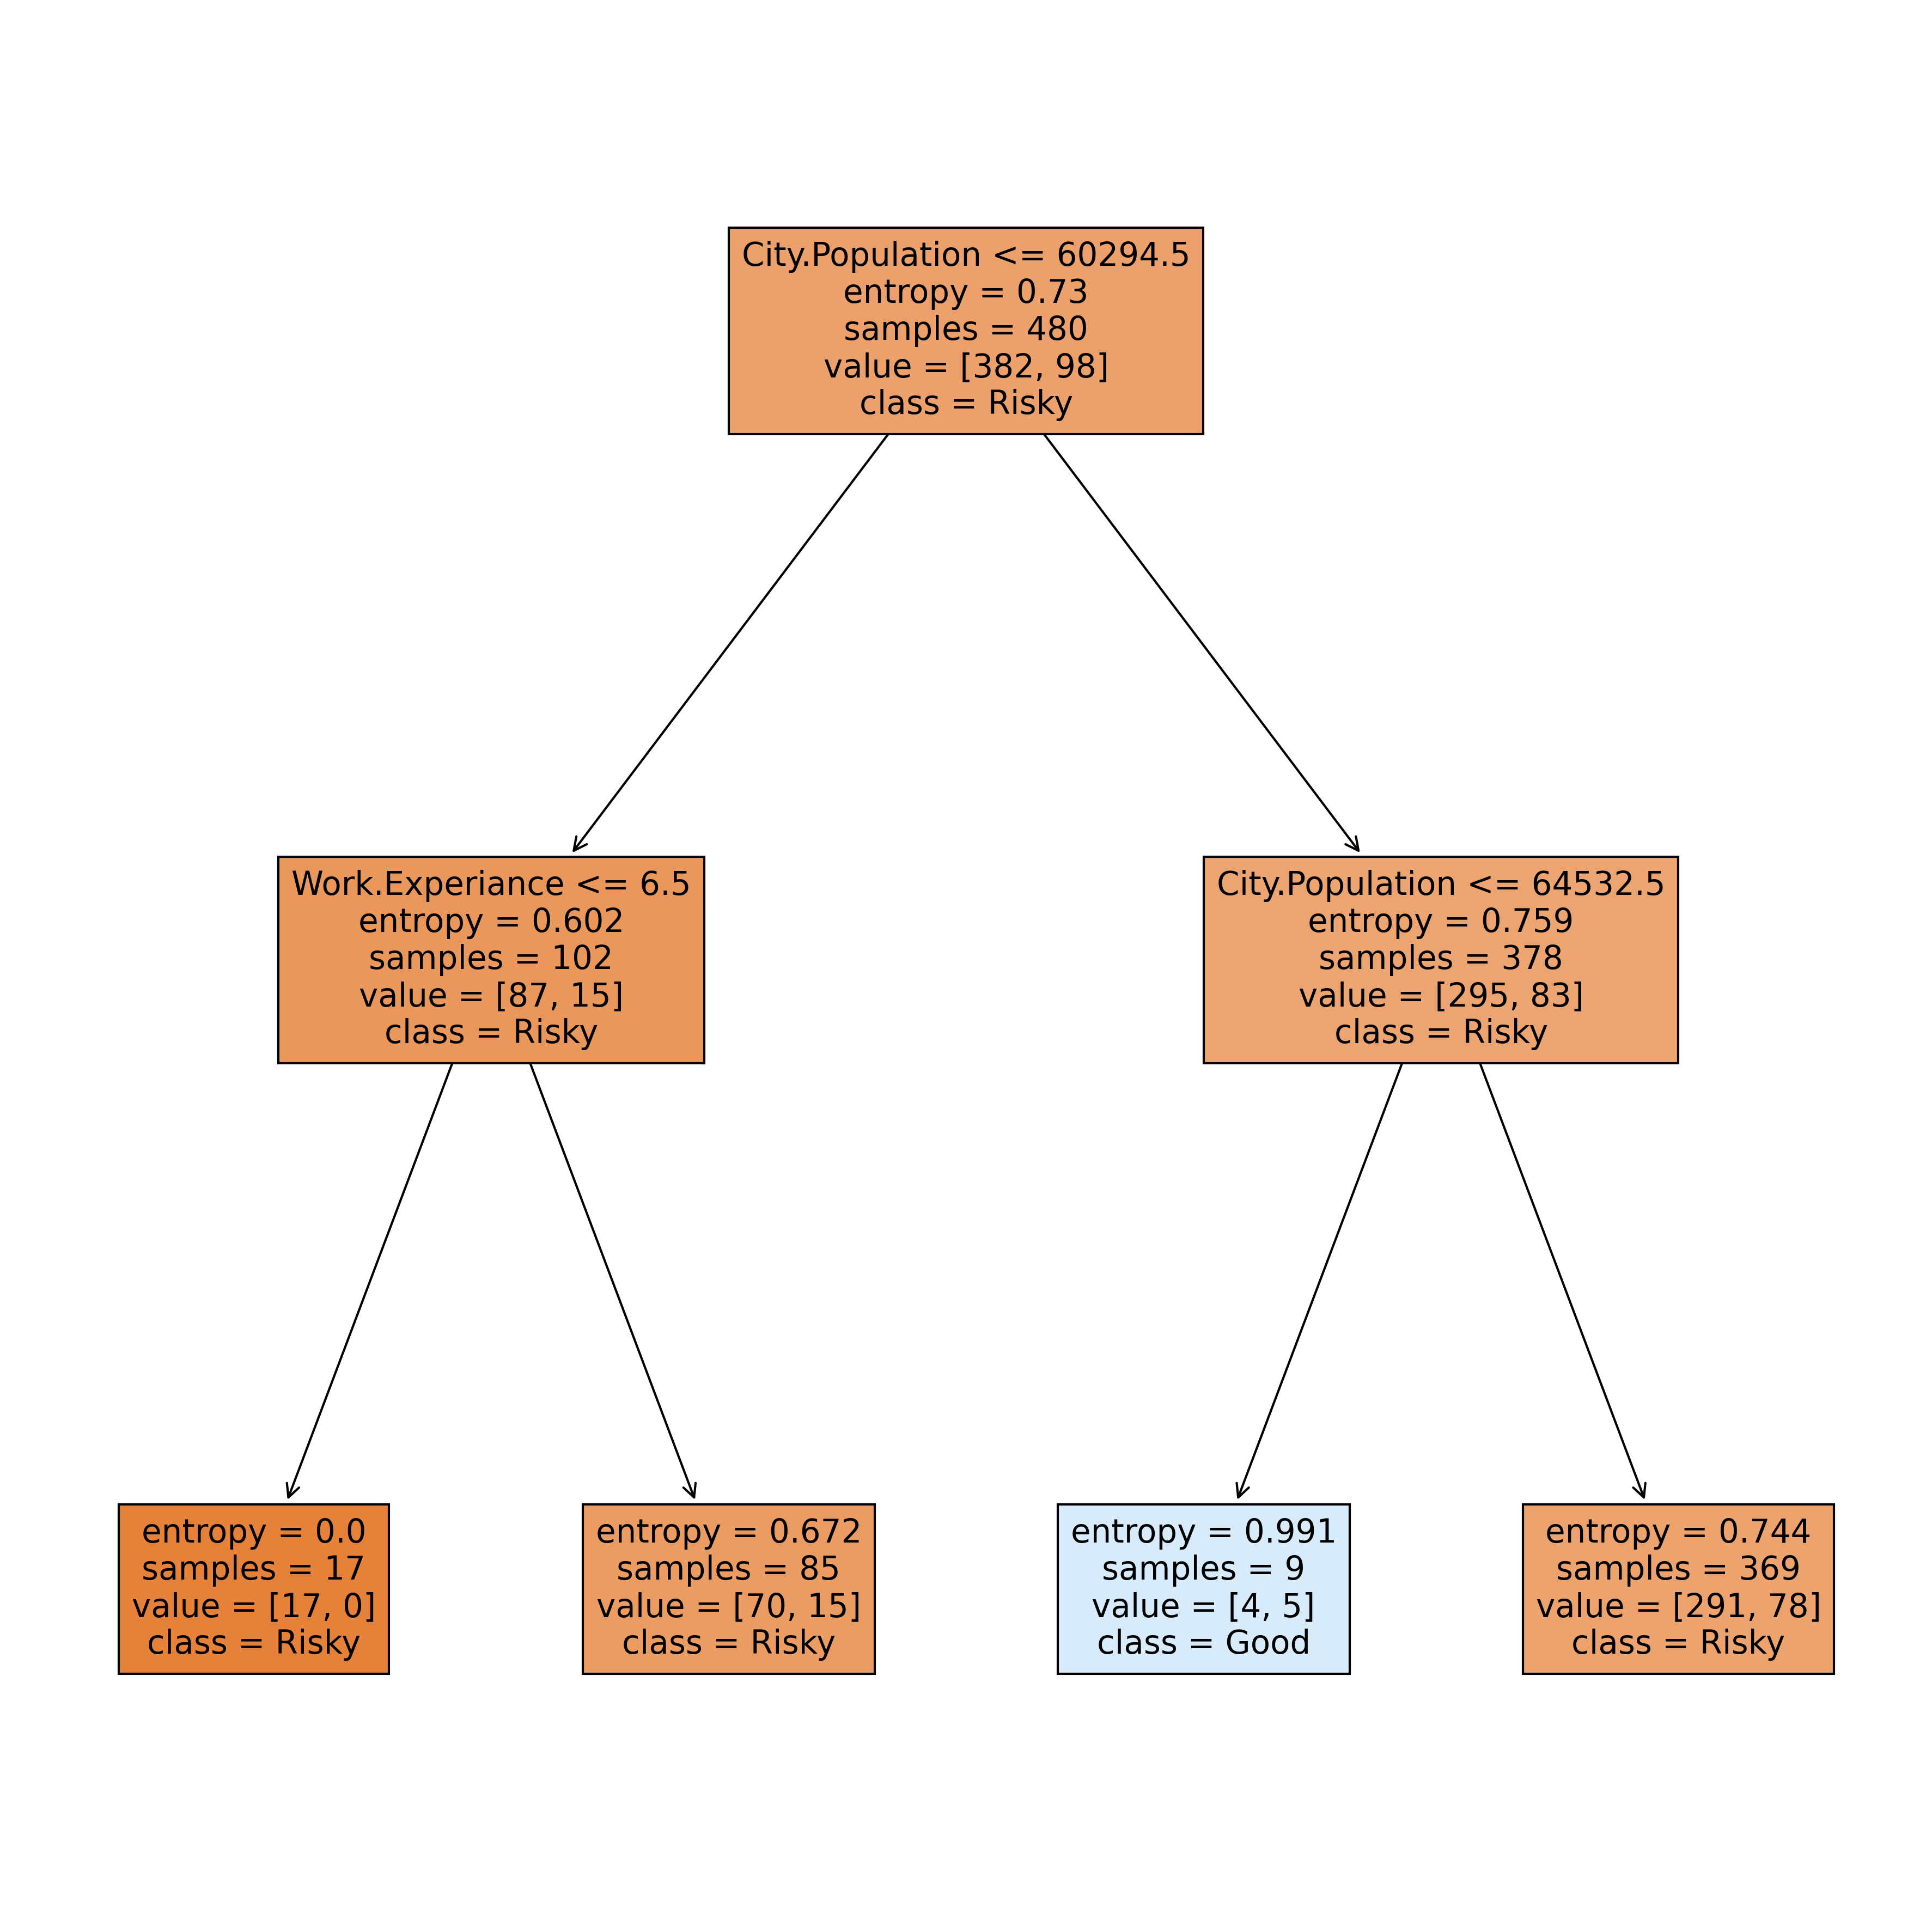

In [18]:
fn = ['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experiance', 'Urban']
cn = ['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [19]:
model.feature_importances_ 

array([0.        , 0.        , 0.56291276, 0.43708724, 0.        ])

In [20]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

0    118
1      2
dtype: int64

In [21]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
pd.crosstab(y_test,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
tax_value,,
0,92,2
1,26,0


In [23]:
# Accuracy 
np.mean(preds==y_test)

0.7666666666666667

# 76% Accuracy

# Building Decision Tree Classifier (CART) using Gini 

In [24]:
model1=DecisionTreeClassifier(criterion='gini',max_depth=2)
model1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

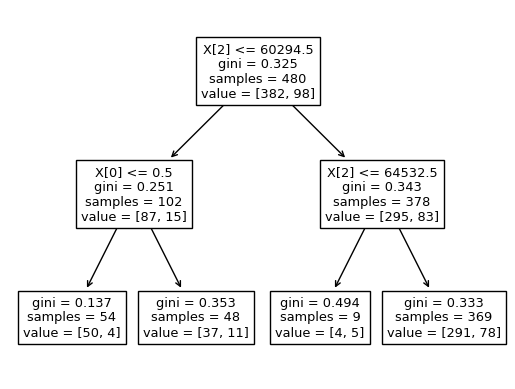

In [25]:
tree.plot_tree(model1);

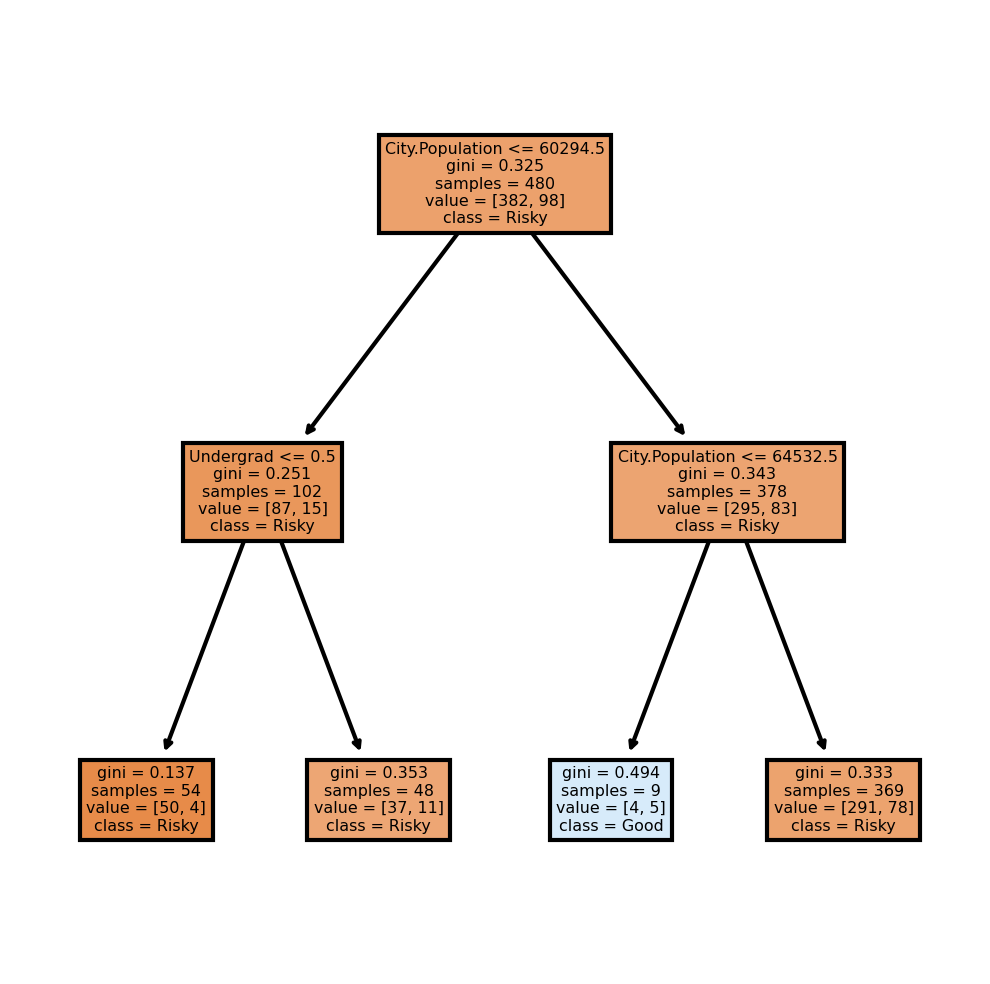

In [26]:
fn = ['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experiance', 'Urban']
cn = ['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model1,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [27]:
pred_gini=model1.predict(x_test)
pd.Series(pred_gini).value_counts()

0    118
1      2
dtype: int64

In [28]:
np.mean(pred_gini==y_test) 

0.7666666666666667

In [29]:
model1.feature_importances_ 

array([0.29466519, 0.        , 0.70533481, 0.        , 0.        ])

# 76% Accuracy